 # IF3070 Foundations of Artificial Intelligence | Tugas Kecil 2
Group Number: 50

Group Members:
- Alessandro Jusack Hasian (18222025)
- Viktor Arsindiantoro Siringoringo (18222083)

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('train.csv')
# test = pd.read_csv('cek.csv')

In [8]:
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [9]:
df.tail()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
140399,235790,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.0,0.079963,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,235791,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.0,0.522907,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,235792,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,235794,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1
140403,235795,464776.txt,https://www.risenenergy.com,26.0,www.risenenergy.com,19.0,NaN,NaN,1.0,0.522907,...,0.0,0.0,NaN,34.0,3.0,3.0,126.0,3.0,129.0,1


# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

In [ ]:
# ? Data Size
print(f"Total size: {df.size} ")
print(f"Instances: {len(df.index)}")
print(f"Features: {len(df.columns)}")


In [ ]:
# ? data type of each greature

print(df.dtypes)

In [ ]:
# n of unique form eahc
print("N amount of unqiue value from each features")
df.nunique(axis = 0) #default 0 sih, cman ttp aja

In [ ]:
# Elemen Frekuensi dari data dalam sebuah Atribut
for c in df.columns:
    print(f"Value counts for {c}:")
    print(df[c].value_counts())
    print("\n")

In [ ]:
#? min max mean median and std from each
df.describe()


### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

In [ ]:
#? missing valuess
# df.isnull().sum() # sama aja
df.isna().sum()

In [ ]:
for i in df.columns:
  print(f'{i}: {df[i].isna().sum()/len(df)*100}%')

In [ ]:
# ? ini jga gatau butuh ato ga, cman jaga2 aja hehe (walaupun dri atas dah keliatan sih)
missing_features = df.columns[df.isna().any()].tolist()
print(f"features that  hae missing values: {missing_features}")

In [ ]:
n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols
plt.figure(figsize=(25, 5 * n_rows))
for j, i in enumerate(df.select_dtypes(exclude='object').columns, 1):
    plt.subplot(n_rows, n_cols, j)
    sns.boxplot(data=df, x=df[i], hue="label")
    plt.title('Boxplot of ['+ i +']', size=14)
    plt.xlabel(" ")
plt.tight_layout()
plt.show()


In [ ]:
def count_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((col < lower_bound) | (col > upper_bound)).sum()
    
    return outliers

for col in numeric_cols:
    outlier_count = count_outliers(df[col])  
    print(f"Jumlah outlier di kolom {col}: {outlier_count}")

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [ ]:
# Korelasi Antara Fitur
corr = df.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(80,80))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
sns.heatmap(
    corr, 
    cmap='RdBu_r', 
    annot=True, 
    fmt=".2f", 
    annot_kws={"fontweight": "bold", "fontsize": 20},
    linewidths=0.5
)      
plt.xticks(fontsize=24, fontweight="bold", rotation=45) 
plt.yticks(fontsize=24, fontweight="bold")

plt.title("Heatmap Korelasi dengan Anotasi dan Label Atribut Besar", fontsize=24, fontweight="bold")
plt.show()

In [ ]:
# Visualize the distribution of each feature (categorical and continuous).
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    plt.title(f'{col} Distribution\nSkewness: {skewness:.2f} | Kurtosis: {kurtosis:.2f}',
              fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.7)
    plt.tight_layout()
    plt.show()
    print(f'\033[1mInterpretasi {col}:\033[0m')
    if abs(skewness) < 0.5:
        print(f"Distribusi mendekati simetris (Skewness: {skewness:.2f})")
    elif skewness > 0.5:
        print(f"Distribusi condong ke kanan (positive skew).")
    else:
        print(f"Distribusi condong ke kiri (negative skew).")
    
    if kurtosis > 3:
        print(f"Distribusi lebih runcing dari normal (leptokurtic).\n")
    elif kurtosis < 3:
        print(f"Distribusi lebih datar dari normal (platykurtic).\n")
    else:
        print(f"Distribusi mendekati normal (mesokurtic).\n")


In [ ]:
conf_matrix.nunique()

In [ ]:
from scipy.stats import kruskal
groups = [df_imputed[df_imputed['FILENAME'] == cat]['label'].dropna() 
          for cat in df_imputed['FILENAME'].unique()]
valid_groups = [group for group in groups if len(group) > 0]

if len(valid_groups) > 1:
    h_stat, p_value = kruskal(*valid_groups)
    print("H-statistic:", h_stat)
    print("P-value:", p_value)
else:
    print("Tidak cukup grup valid untuk Kruskal-Wallis.")


In [ ]:
df_imputed

In [ ]:
resource_features = [
    'HasFavicon','IsResponsive', 'HasDescription', 
    'HasExternalFormSubmit', 'HasSocialNet', 
    'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 
    'Pay', 'Crypto', 'HasCopyrightInfo'
]
correlation_matrix = df[resource_features + ['label']].corr()
correlation_with_label = correlation_matrix['label'].drop(labels='label').sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_label.to_frame(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation between URL Characteristics and Label (Phishing/Non-Phishing)")
plt.xlabel("Correlation with Label")
plt.ylabel("URL Features")
plt.show()

## B. Data Insights

The objective of this section is for participants to understand how to formulate and get many insights from the given data so that we can improve the model performance. Given example questions:

1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?
2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?
3. How does website-resource-related features vary across phishing and non-phishing URLs?

### Step 1

Answer the three example questions by visualizing and explaining the insights for each question. Add markdown texts to explain the visualizations.

#### 1. How was the proportion between phishing and non-phishing URLs on security related features (`IsHTTPS` and `Robots`)?

In [ ]:

is_https_counts = df.groupby(['label', 'IsHTTPS']).size().unstack()
is_https_proportion = is_https_counts.div(is_https_counts.sum(axis=1), axis=0)

is_https_proportion.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 5))
plt.title("Proporsi URL Phishing vs Non-Phishing pada IsHTTPS")
plt.ylabel("Proporsi")
plt.xlabel("Label (Phishing/Non-Phishing)")
plt.xticks(rotation=0)
plt.legend(title="IsHTTPS", loc='upper right')
plt.show()
robots_counts = df.groupby(['label', 'Robots']).size().unstack()
robots_proportion = robots_counts.div(robots_counts.sum(axis=1), axis=0)

robots_proportion.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 5))
plt.title("Proporsi URL Phishing vs Non-Phishing pada Robots")
plt.ylabel("Proporsi")
plt.xlabel("Label (Phishing/Non-Phishing)")
plt.xticks(rotation=0)
plt.legend(title="Robots", loc='upper right')
plt.show()


#### 2. Is there a significant correlation between the label of a URL (phishing or non-phishing) and its URL characteristics?

URL Characteristics:
- `URLLength`
- `Domain`
- `DomainLength`
- `IsDomainIP`
- `TLD`
- `TLDLength`
- `NoOfSubDomain`
- `HasObfuscation`
- `NoOfObfuscatedChar`
- `ObfuscationRatio`
- `NoOfLettersInURL`
- `LetterRatioInURL`
- `NoOfDegitsInURL`
- `DegitRatioInURL`
- `NoOfEqualsInURL`
- `NoOfQMarkInURL`
- `NoOfAmpersandInURL`
- `NoOfOtherSpecialCharsInURL`
- `SpacialCharRatioInURL`
- `CharContinuationRate`

In [ ]:
url_features = [
    'URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
    'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL', 'CharContinuationRate'
]
df_imputed = df.copy()
df_imputed[url_features] = df_imputed[url_features].fillna(df_imputed[url_features].mean())
for feature in url_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_imputed, x='label', y=feature, palette='Set2')
    plt.title(f"Distribusi {feature} Berdasarkan Label")
    plt.xlabel("Label (0: Non-Phishing, 1: Phishing)")
    plt.ylabel(feature)
    plt.show()
    correlation, p_value = stats.pointbiserialr(df_imputed['label'], df_imputed[feature])
    print(f"Korelasi antara {feature} dan Label: {correlation:.2f} (p-value: {p_value:.4f})")


In [ ]:
correlation_matrix = df_imputed[url_features + ['label']].corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antara Fitur URL dan Label (0: Non-Phishing, 1: Phishing)")
plt.show()

In [ ]:
url_features = [
    'URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
    'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL', 'CharContinuationRate'
]
correlation_matrix = df[url_features + ['label']].corr()
correlation_with_label = correlation_matrix['label'].drop(labels='label').sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_label.to_frame(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation between URL Characteristics and Label (Phishing/Non-Phishing)")
plt.xlabel("Correlation with Label")
plt.ylabel("URL Features")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
label_encoders = {}
for col in ['Domain', 'TLD', 'Title']:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col].astype(str)) 
url_features = [
    'URLLength', 'DomainLength', 'IsDomainIP', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
    'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL', 'CharContinuationRate', 'Domain', 'TLD', 'Title', 'label'
]
df_numeric = df_encoded[url_features]
correlation_matrix = df_numeric.corr()
correlation_with_label = correlation_matrix['label'].drop(labels='label').sort_values(ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_label.to_frame(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation between URL Characteristics (including Domain/TLD/Title) and Label (Phishing/Non-Phishing)")
plt.xlabel("Correlation with Label")
plt.ylabel("URL Features")
plt.show()



#### 3. How does website-resource-related features vary across phishing and non-phishing URLs?

Website resource related features:
- `NoOfImage`
- `NoOfCSS`
- `NoOfJS`
- `NoOfSelfRef`
- `NoOfEmptyRef`
- `NoOfExternalRef`

In [ ]:
resource_features = ['NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']

for feature in resource_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='label', y=feature, palette='Set2')
    plt.title(f"Distribusi {feature} Berdasarkan Label (0: Non-Phishing, 1: Phishing)")
    plt.xlabel("Label (0: Non-Phishing, 1: Phishing)")
    plt.ylabel(feature)
    plt.show()
for feature in resource_features:
    phishing_data = df[df['label'] == 0][feature]
    non_phishing_data = df[df['label'] == 1][feature]
    
    phishing_mean = phishing_data.mean()
    non_phishing_mean = non_phishing_data.mean()
    
    phishing_median = phishing_data.median()
    non_phishing_median = non_phishing_data.median()
    
    phishing_std = phishing_data.std()
    non_phishing_std = non_phishing_data.std()
    
    phishing_min = phishing_data.min()
    non_phishing_min = non_phishing_data.min()
    
    phishing_max = phishing_data.max()
    non_phishing_max = non_phishing_data.max()
    
    phishing_q1 = phishing_data.quantile(0.25)
    non_phishing_q1 = non_phishing_data.quantile(0.25)
    
    phishing_q3 = phishing_data.quantile(0.75)
    non_phishing_q3 = non_phishing_data.quantile(0.75)
    
    print(f"Statistik untuk {feature}:")
    print(f"  - Phishing:")
    print(f"    - Rata-rata      : {phishing_mean:.2f}")
    print(f"    - Median        : {phishing_median:.2f}")
    print(f"    - Standar Deviasi: {phishing_std:.2f}")
    print(f"    - Min           : {phishing_min:.2f}")
    print(f"    - Max           : {phishing_max:.2f}")
    print(f"    - Q1            : {phishing_q1:.2f}")
    print(f"    - Q3            : {phishing_q3:.2f}")
    
    print(f"  - Non-Phishing:")
    print(f"    - Rata-rata      : {non_phishing_mean:.2f}")
    print(f"    - Median        : {non_phishing_median:.2f}")
    print(f"    - Standar Deviasi: {non_phishing_std:.2f}")
    print(f"    - Min           : {non_phishing_min:.2f}")
    print(f"    - Max           : {non_phishing_max:.2f}")
    print(f"    - Q1            : {non_phishing_q1:.2f}")
    print(f"    - Q3            : {non_phishing_q3:.2f}")
    print("-" * 50)

In [ ]:
resource_features = [
    'HasFavicon','IsResponsive', 'HasDescription', 
    'HasExternalFormSubmit', 'HasSocialNet', 
    'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 
    'Pay', 'Crypto', 'HasCopyrightInfo'
]
for feature in resource_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='label', palette='Set2', kde=True, multiple='dodge')
    plt.title(f"Distribusi {feature} Berdasarkan Label (0: Phishing, 1: Non-Phishing)")
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.show()


### Feature Engineering 

In [ ]:
url_features = [
    'URLLength', 'DomainLength','IsDomainIP', 'TLDLength', 'NoOfSubDomain',
    'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
    'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'SpacialCharRatioInURL', 'CharContinuationRate','LineOfCode'
]

for feature in url_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='label', y=feature, palette='Set2')
    plt.title(f"Distribusi {feature} Berdasarkan Label (0: Non-Phishing, 1: Phishing)")
    plt.xlabel("Label (0: Non-Phishing, 1: Phishing)")
    plt.ylabel(feature)
    plt.show()
for feature in url_features:
    phishing_data = df[df['label'] == 0][feature]
    non_phishing_data = df[df['label'] == 1][feature]
    
    phishing_mean = phishing_data.mean()
    non_phishing_mean = non_phishing_data.mean()
    
    phishing_median = phishing_data.median()
    non_phishing_median = non_phishing_data.median()
    
    phishing_std = phishing_data.std()
    non_phishing_std = non_phishing_data.std()
    
    phishing_min = phishing_data.min()
    non_phishing_min = non_phishing_data.min()
    
    phishing_max = phishing_data.max()
    non_phishing_max = non_phishing_data.max()
    
    phishing_q1 = phishing_data.quantile(0.25)
    non_phishing_q1 = non_phishing_data.quantile(0.25)
    
    phishing_q3 = phishing_data.quantile(0.75)
    non_phishing_q3 = non_phishing_data.quantile(0.75)
    
    print(f"Statistik untuk {feature}:")
    print(f"  - Phishing:")
    print(f"    - Rata-rata      : {phishing_mean:.2f}")
    print(f"    - Median        : {phishing_median:.2f}")
    print(f"    - Standar Deviasi: {phishing_std:.2f}")
    print(f"    - Min           : {phishing_min:.2f}")
    print(f"    - Max           : {phishing_max:.2f}")
    print(f"    - Q1            : {phishing_q1:.2f}")
    print(f"    - Q3            : {phishing_q3:.2f}")
    
    print(f"  - Non-Phishing:")
    print(f"    - Rata-rata      : {non_phishing_mean:.2f}")
    print(f"    - Median        : {non_phishing_median:.2f}")
    print(f"    - Standar Deviasi: {non_phishing_std:.2f}")
    print(f"    - Min           : {non_phishing_min:.2f}")
    print(f"    - Max           : {non_phishing_max:.2f}")
    print(f"    - Q1            : {non_phishing_q1:.2f}")
    print(f"    - Q3            : {non_phishing_q3:.2f}")
    print("-" * 50)

In [ ]:
x = 0
y=0
for index, row in df.iterrows():  
    if (row['HasExternalFormSubmit']==1 and row['Bank']==1 and row['Crypto']==1 and row['HasPasswordField']==1 and row['IsResponsive']==1 and row['HasDescription']==1 and row['HasSocialNet']==1 and row['HasCopyrightInfo']==1) :  
        x += 1
    if (row['IsResponsive']==1 and row['HasDescription']==1 and row['HasSocialNet']==1 and row['HasCopyrightInfo']==1) :  
        y += 1
print(x)
print(x/len(df))

print(y)
print(y/len(df))


In [ ]:
from scipy.stats import f_oneway

# Contoh data
data = pd.DataFrame({
    'kategori': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
    'label': [1, 2, 3, 4, 2, 5, 6]
})

# Split data berdasarkan kategori
groups = [data[data['kategori'] == cat]['label'] for cat in data['kategori'].unique()]

# Hitung ANOVA
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("P-value:", p_value)


In [ ]:
cat_obj_cols = df.select_dtypes(include = ['object'])

In [ ]:
cat_obj_cols = cat_obj_cols.sample(frac = 0.2, random_state = 42)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
cramers_v_values = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['label'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_v_values[feature] = cramers_v
cramers_v_df = pd.DataFrame(list(cramers_v_values.items()), columns=['Feature', 'Cramers_V'])
cramers_v_df.set_index('Feature', inplace=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Hitung Cramér's V untuk setiap fitur kategorikal terhadap label
cramers_v_values = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['label'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_v_values[feature] = cramers_v
cramers_v_df = pd.DataFrame(list(cramers_v_values.items()), columns=['Feature', 'Cramers_V'])
cramers_v_df.set_index('Feature', inplace=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', cbar=True)
plt.xlabel("Label") 
plt.title("Cramér's V Correlation with Label")
plt.xticks([]) 
plt.show()


In [ ]:
filtered_df = df.copy()

filtered_df["IsHTTPS"] = "N/A"
filtered_df["URL"].fillna("", inplace=True)
for idx, row in filtered_df.iterrows():
    if row["URL"].startswith("https://"):
        filtered_df.at[idx, "IsHTTPS"] = "https"
    elif row["URL"].startswith("http://"):
        filtered_df.at[idx, "IsHTTPS"] = "http"

filtered_df["Robots"] = filtered_df["Robots"].map({1: "Robots", 0: "Non-Robots"}).fillna("N/A")

label_colors = ['grey', 'skyblue', 'pink']

https_counts = {
    "Non-Phishing (HTTPS)": filtered_df[filtered_df["label"] == 1]["IsHTTPS"].value_counts().sort_index(),
    "Phishing (HTTPS)": filtered_df[filtered_df["label"] == 0]["IsHTTPS"].value_counts().sort_index(),
}

robots_counts = {
    "Non-Phishing (Robots)": filtered_df[filtered_df["label"] == 1]["Robots"].value_counts().sort_index(),
    "Phishing (Robots)": filtered_df[filtered_df["label"] == 0]["Robots"].value_counts().sort_index(),
}

pie_data = list(https_counts.values()) + list(robots_counts.values())
titles = list(https_counts.keys()) + list(robots_counts.keys())

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, ax in enumerate(axes.flat):
    ax.pie(pie_data[idx], labels=pie_data[idx].index, autopct='%1.1f%%', startangle=90, colors=label_colors)
    ax.set_title(titles[idx])
    ax.legend(pie_data[idx].index, title="Categories", loc="center left", bbox_to_anchor=(1.05, 0.5))

plt.subplots_adjust(right=0.85, hspace=0.4, wspace=0.4)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. DomainTitleMatchScore
sns.boxplot(data=df, x='label', y='DomainTitleMatchScore')
plt.title("DomainTitleMatchScore by Label")
plt.show()

# Rata-rata DomainTitleMatchScore
print("Mean DomainTitleMatchScore by Label:\n", df.groupby('label')['DomainTitleMatchScore'].mean())

# 2. URLTitleMatchScore
sns.boxplot(data=df, x='label', y='URLTitleMatchScore')
plt.title("URLTitleMatchScore by Label")
plt.show()

# Rata-rata URLTitleMatchScore
print("Mean URLTitleMatchScore by Label:\n", df.groupby('label')['URLTitleMatchScore'].mean())

# 3. NoOfPopUp
sns.boxplot(data=df, x='label', y='NoOfPopup')
plt.title("Number of Pop-ups by Label")
plt.show()

# Rata-rata jumlah pop-ups
print("Mean NoOfPopUp by Label:\n", df.groupby('label')['NoOfPopup'].mean())

# 4. NoOfiFrame
sns.boxplot(data=df, x='label', y='NoOfiFrame')
plt.title("Number of iFrames by Label")
plt.show()

# Rata-rata jumlah iFrames
print("Mean NoOfiFrame by Label:\n", df.groupby('label')['NoOfiFrame'].mean())


In [ ]:
mean_popups = df.groupby('label')['NoOfPopup'].mean().reset_index()

sns.barplot(data=mean_popups, x='label', y='NoOfPopup', palette='viridis')
plt.title("Average Number of Pop-ups by Label")
plt.xlabel("Label (0: Non-Phishing, 1: Phishing)")
plt.ylabel("Average Number of Pop-ups")
plt.show()


In [ ]:
# Membuat dataframe rata-rata
mean_features = df.groupby('label')[['DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfiFrame','NoOfPopup']].mean().reset_index()

# Plot barplot
mean_features_melt = mean_features.melt(id_vars='label', var_name='Feature', value_name='Mean Value')
sns.barplot(data=mean_features_melt, x='Feature', y='Mean Value', hue='label', palette='viridis')
plt.title("Average Feature Values by Label")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.legend(title="Label", labels=["Non-Phishing (0)", "Phishing (1)"])
plt.show()


In [ ]:
# Membuat dataframe rata-rata
mean_features = df.groupby('label')[['DomainTitleMatchScore', 'URLTitleMatchScore']].mean().reset_index()

# Plot barplot
mean_features_melt = mean_features.melt(id_vars='label', var_name='Feature', value_name='Mean Value')
sns.barplot(data=mean_features_melt, x='Feature', y='Mean Value', hue='label', palette='viridis')
plt.title("Average Feature Values by Label")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.show()


In [ ]:
mean_features

In [ ]:
mean_features = df.groupby('label')[['DomainTitleMatchScore', 'URLTitleMatchScore']].mean().reset_index()
mean_features_melt = mean_features.melt(id_vars='label', var_name='Feature', value_name='Mean Value')
sns.barplot(data=mean_features_melt, x='Feature', y='Mean Value', hue='label', palette='viridis')
plt.title("Average Feature Values by Label")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.legend(title="Label", labels=["Non-Phishing (0)", "Phishing (1)"])
plt.show()
features = ['NoOfiFrame', 'NoOfPopup']

def print_feature_statistics(df, feature):
    # Pisahkan data berdasarkan label
    phishing_data = df[df['label'] == 1][feature]
    non_phishing_data = df[df['label'] == 0][feature]

    # Hitung statistik untuk phishing
    phishing_mean = phishing_data.mean()
    phishing_median = phishing_data.median()
    phishing_std = phishing_data.std()
    phishing_min = phishing_data.min()
    phishing_max = phishing_data.max()
    phishing_q1 = phishing_data.quantile(0.25)
    phishing_q3 = phishing_data.quantile(0.75)

    # Hitung statistik untuk non-phishing
    non_phishing_mean = non_phishing_data.mean()
    non_phishing_median = non_phishing_data.median()
    non_phishing_std = non_phishing_data.std()
    non_phishing_min = non_phishing_data.min()
    non_phishing_max = non_phishing_data.max()
    non_phishing_q1 = non_phishing_data.quantile(0.25)
    non_phishing_q3 = non_phishing_data.quantile(0.75)

    # Print hasil statistik
    print(f"Statistik untuk {feature}:")
    print(f"  - Phishing:")
    print(f"    - Rata-rata      : {phishing_mean:.2f}")
    print(f"    - Median        : {phishing_median:.2f}")
    print(f"    - Standar Deviasi: {phishing_std:.2f}")
    print(f"    - Min           : {phishing_min:.2f}")
    print(f"    - Max           : {phishing_max:.2f}")
    print(f"    - Q1            : {phishing_q1:.2f}")
    print(f"    - Q3            : {phishing_q3:.2f}")
    
    print(f"  - Non-Phishing:")
    print(f"    - Rata-rata      : {non_phishing_mean:.2f}")
    print(f"    - Median        : {non_phishing_median:.2f}")
    print(f"    - Standar Deviasi: {non_phishing_std:.2f}")
    print(f"    - Min           : {non_phishing_min:.2f}")
    print(f"    - Max           : {non_phishing_max:.2f}")
    print(f"    - Q1            : {non_phishing_q1:.2f}")
    print(f"    - Q3            : {non_phishing_q3:.2f}")
    print("-" * 50)

# Menampilkan statistik untuk fitur NoOfiFrame dan NoOfPopUp
for feature in features:
    print_feature_statistics(df, feature)


# Atur Atur dah Bang

In [11]:
from sklearn.impute import SimpleImputer

# Mendapatkan kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# numeric_cols1 = test.select_dtypes(include=['float64', 'int64']).columns.tolist()
# categorical_cols1 = test.select_dtypes(include=['object']).columns.tolist()
# Imputer untuk kolom numerik
numeric_imputer = SimpleImputer(strategy='mean')

# Imputer untuk kolom yang perlu diisi dengan median
median_cols = ['CharContinuationRate']

# Imputasi untuk kolom numerik
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
# # test[numeric_cols1] = numeric_imputer.fit_transform(test[numeric_cols1])
# Imputasi untuk kolom yang perlu menggunakan median (misalnya 'CharContinuationRate')
median_imputer = SimpleImputer(strategy='median')
df[median_cols] = median_imputer.fit_transform(df[median_cols])
# # test[median_cols] = numeric_imputer.fit_transform(test[median_cols])
# Imputer untuk kolom kategorikal
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Imputasi untuk kolom kategorikal
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
# # test[categorical_cols] = categorical_imputer.fit_transform(test[categorical_cols])
# Periksa apakah ada nilai kosong setelah imputasi
print(df.isnull().sum())
# print(test.isnull().sum())

id                            0
FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [13]:
df = df.drop(columns=df.select_dtypes(include='object').columns)
# test = test.drop(columns=test.select_dtypes(include='object').columns)
df.head()

,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1.0,24.000000,17.000000,0.000000,0.800000,0.277482,0.059286,2.729015,2.0,0.000000,...,0.000000,0.0,1.0,41.647489,3.000000,16.461729,69.0000,3.733846,78.104273,1.0
1,4.0,27.701473,19.619387,0.000488,1.000000,0.000896,0.036850,2.000000,0.0,0.000402,...,0.345706,0.0,0.0,41.647489,10.268623,16.461729,104.8759,3.733846,1.000000,0.0
2,5.0,35.000000,28.000000,0.000000,0.857143,0.277482,0.060894,2.729015,2.0,0.000402,...,1.000000,0.0,1.0,33.000000,7.000000,8.000000,15.0000,3.733846,2.000000,1.0
3,6.0,31.000000,19.619387,0.000488,0.562500,0.522907,0.055829,2.729015,1.0,0.000402,...,1.000000,0.0,1.0,24.000000,5.000000,14.000000,104.8759,3.733846,78.104273,1.0
4,11.0,27.701473,22.000000,0.000000,1.000000,0.277482,0.059286,2.729015,1.0,0.000402,...,0.000000,0.0,1.0,41.647489,10.268623,14.000000,104.8759,0.000000,78.104273,1.0


In [15]:
def calculate_total_resources(X):
    total = X['NoOfImage'] + X['NoOfCSS'] + X['NoOfJS'] + X['NoOfSelfRef'] + X['NoOfEmptyRef'] + X['NoOfExternalRef']       
    X['resources'] = total
    return X
def feature_securing(data):
    data['IsHTTPS'] = data['IsHTTPS'].astype(int)
    data['Robots'] = data['Robots'].astype(int)
 

    Risk_Score = (1 - data['Robots']) * 3  
    
    # Menandai risiko tinggi jika skor risiko lebih besar dari 2
    data['isHighRisk'] = (Risk_Score > 2).astype(int)
    
 
    
    return data
def create_phishing_features(data):
    Phishing_Score = (
        data['HasExternalFormSubmit'] + 
        data['HasPasswordField'] + 
        data['Bank'] + 
        data['Crypto']
    )
    Non_Phishing_Score = (
        data['IsResponsive'] + 
        data['HasDescription'] + 
        data['HasSocialNet'] + 
        data['HasCopyrightInfo']
    )
    data['Phising'] = Phishing_Score

    return data
def create_NoNphishing_features(data):
    Non_Phishing_Score = (
        data['IsResponsive'] + 
        data['HasDescription'] + 
        data['HasSocialNet'] + 
        data['HasCopyrightInfo']
    )
    data['Non_Phising'] = Non_Phishing_Score

    return data
def apply_feature_engineering(X: pd.DataFrame) -> pd.DataFrame:
    X = create_phishing_features(X)
    X = create_NoNphishing_features(X)
    return X

In [16]:
df = apply_feature_engineering(df)
# test = apply_feature_engineering(test)

In [17]:
def check_outliers_iqr(df,col):
    col_Q1 = df[col].quantile(0.25)
    col_Q3 = df[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    col_RLB = col_Q1 - 1.5 * col_IQR
    col_RUB = col_Q3 + 1.5 * col_IQR
    outliers = len(df.loc[(df[col]>col_RUB) | (df[col]<col_RLB)])
    return outliers/len(df)*100
for i in df.columns:
    print(f'Outliers for {i}: {check_outliers_iqr(df,i)}%')
    print(f'Data skew for {i}: {df[i].skew()}')

Outliers for id: 0.0%
Data skew for id: 0.004738179434029008
Outliers for URLLength: 15.604256288994616%
Data skew for URLLength: 147.73174698674129
Outliers for DomainLength: 5.773339790889148%
Data skew for DomainLength: 2.5606687173733844
Outliers for IsDomainIP: 0.03418706019771516%
Data skew for IsDomainIP: 54.04498443946101
Outliers for CharContinuationRate: 12.274579071821316%
Data skew for CharContinuationRate: -2.328804069305018
Outliers for TLDLegitimateProb: 0.0%
Data skew for TLDLegitimateProb: -0.04519542239507344
Outliers for URLCharProb: 20.05498418848466%
Data skew for URLCharProb: -1.4605107041576775
Outliers for TLDLength: 20.79285490441868%
Data skew for TLDLength: 1.3119721314527617
Outliers for NoOfSubDomain: 11.351528446483005%
Data skew for NoOfSubDomain: 2.760174734520385
Outliers for HasObfuscation: 0.021366912623571977%
Data skew for HasObfuscation: 68.37100297157191
Outliers for NoOfObfuscatedChar: 0.01638129967807185%
Data skew for NoOfObfuscatedChar: 364.51

In [18]:
import numpy as np

def feature_log_transformation(X: pd.DataFrame) -> pd.DataFrame:
    columns_to_transform = [
        'IsDomainIP', 'URLCharProb', 'NoOfLettersInURL', 'NoOfDegitsInURL',
        'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
        'LargestLineLength', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
        'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef',
        'URLLength', 'NoOfiFrame', 'NoOfObfuscatedChar',
        'HasObfuscation', 'ObfuscationRatio'
    ]
    X[columns_to_transform] = X[columns_to_transform].clip(lower=0.0001)
    for col in columns_to_transform:
        X[col] = np.log1p(X[col])
    return X

df = feature_log_transformation(df.copy())
# test = feature_log_transformation(test.copy())


In [19]:
df=df.drop(columns=['id','DomainLength','NoOfOtherSpecialCharsInURL','IsHTTPS','HasFavicon','HasSubmitButton','HasHiddenFields','Pay'])


In [ ]:
# test=test.drop(columns=['URLSimilarityIndex','DomainLength','NoOfOtherSpecialCharsInURL','IsHTTPS','HasFavicon','HasSubmitButton','HasHiddenFields','Pay'])

In [20]:
for i in df.columns : 
    print(i)
    print(df[i].describe())


URLLength
count    140404.000000
mean          3.333453
std           0.182092
min           2.708050
25%           3.258097
50%           3.356948
75%           3.356948
max           8.307706
Name: URLLength, dtype: float64
IsDomainIP
count    140404.000000
mean          0.000453
std           0.012811
min           0.000100
25%           0.000100
50%           0.000100
75%           0.000488
max           0.693147
Name: IsDomainIP, dtype: float64
CharContinuationRate
count    140404.000000
mean          0.918007
std           0.129074
min           0.000000
25%           0.918007
50%           0.918007
75%           1.000000
max           1.000000
Name: CharContinuationRate, dtype: float64
TLDLegitimateProb
count    140404.000000
mean          0.277482
std           0.195904
min           0.000000
25%           0.079963
50%           0.277482
75%           0.522907
max           0.522907
Name: TLDLegitimateProb, dtype: float64
URLCharProb
count    140404.000000
mean          0.05757

In [21]:
from sklearn.preprocessing import RobustScaler

attributes = [
    "URLLength", 
    "TLDLength", 
    "NoOfSubDomain", 
    "NoOfObfuscatedChar", 
    "LineOfCode", 
    "DomainTitleMatchScore"
]


# Buat scaler
scaler = RobustScaler()

# Fit dan transform pada data latih (training data)
df[attributes] = scaler.fit_transform(df[attributes])

# Transform hanya pada data uji (test data) menggunakan scaler yang sama
# test[attributes] = scaler.transform(test[attributes])


In [22]:
df.describe()

,URLLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Phising,Non_Phising
count,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000,1.404040e+05,140404.000000,140404.000000,140404.000000,140404.000000,...,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000,140404.000000
mean,-0.237688,0.000453,0.918007,0.277482,0.057577,-1.522765e-16,1.000000,0.000389,0.532212,0.000114,...,0.751543,3.278104,2.135350,2.626877,4.075650,0.993367,3.939996,0.924831,0.407987,2.985509
std,1.842073,0.012811,0.129074,0.195904,0.006065,1.598897e+00,2.283583,0.010129,4.919209,0.001166,...,0.311710,1.100640,0.776424,0.784967,1.441795,0.901727,1.123306,0.263664,0.489728,0.789500
min,-6.564347,0.000100,0.000000,0.000000,0.001228,-2.690240e+00,-6.194162,0.000100,0.000000,0.000100,...,0.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000000,0.000000,0.000000
25%,-1.000000,0.000100,0.918007,0.079963,0.056909,0.000000e+00,0.000000,0.000100,0.000000,0.000100,...,0.751543,2.890372,1.791759,2.484907,3.891820,0.000100,3.663562,1.000000,0.132397,2.548208
50%,0.000000,0.000100,0.918007,0.277482,0.057595,0.000000e+00,0.000000,0.000100,0.000000,0.000100,...,0.751543,3.752968,2.422022,2.860012,4.662268,1.098612,4.370767,1.000000,0.206874,3.233966
75%,0.000000,0.000488,1.000000,0.522907,0.060049,1.000000e+00,1.000000,0.000402,1.000000,0.000100,...,1.000000,3.752968,2.422022,2.860012,4.662268,1.554738,4.370767,1.000000,0.373533,3.548208
max,50.082568,0.693147,1.000000,0.522907,0.085045,3.790240e+01,37.164974,0.693147,973.200945,0.192272,...,1.000000,9.100191,10.486290,7.947679,10.188554,8.494539,10.222559,1.000000,4.000000,4.000000


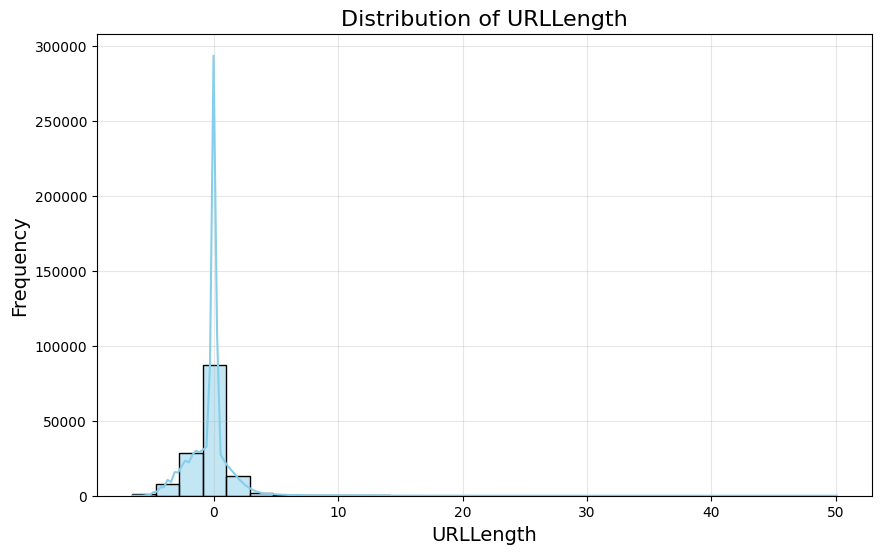

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['URLLength'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of URLLength', fontsize=16)
plt.xlabel('URLLength', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])
y = df['label']
# X_test = test.drop(columns=['label'])
# y_test = test['label']
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2,stratify=df["label"] , random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test1)

In [28]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, cohen_kappa_score, balanced_accuracy_score, classification_report

In [32]:
# from sklearn.metrics import classification_report, f1_score
print(f'Accuracy: {accuracy_score(y_test1, knn_pred)}')
print(f'F1 Score: {f1_score(y_test1, knn_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test1, knn_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test1, knn_pred)}")
print("KNeighbors Classifier")
print(classification_report(y_test1, knn_pred))
print()

Accuracy: 0.9860759944446423
F1 Score: 0.9856064772904263
Recall Score: 0.9860759944446423
Balanced Accuracy: 0.9187051451525436
KNeighbors Classifier
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      2111
         1.0       0.99      1.00      0.99     25970

    accuracy                           0.99     28081
   macro avg       0.98      0.92      0.95     28081
weighted avg       0.99      0.99      0.99     28081




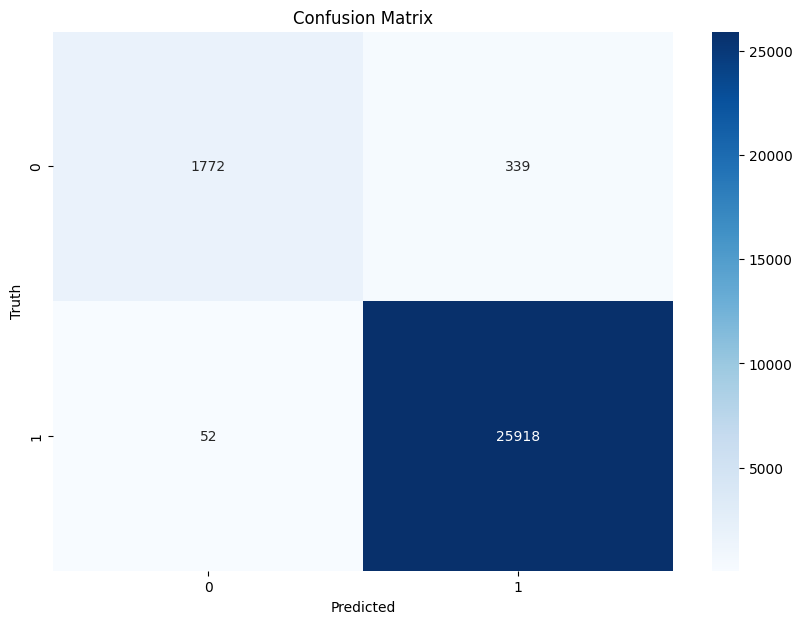

In [33]:
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test1, knn_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi dan training model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prediksi
gnb_pred = gnb.predict(X_test1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score,balanced_accuracy_score, classification_report
print(classification_report(y_test1, gnb_pred))
print()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
from sklearn.metrics import accuracy_score, f1_score, recall_score, cohen_kappa_score, balanced_accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test, gnb_pred)}')
print(f'F1 Score: {f1_score(y_test, gnb_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test, gnb_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, gnb_pred)}")
print("Classification Report:")
print(classification_report(y_test, gnb_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, gnb_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train_balanced)
sample_weights = y_train_balanced.map(lambda x: class_weights[int(x)])
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights)
gnb_pred = gnb.predict(X_test1)
print("Classification Report:")
print(classification_report(y_test1, gnb_pred))
cm = confusion_matrix(y_test1, gnb_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Weighted Gaussian Naive Bayes with SMOTE")
plt.show()


In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='mean')
median_cols = ['CharContinuationRate']
train[numeric_cols] = numeric_imputer.fit_transform(train[numeric_cols])
median_imputer = SimpleImputer(strategy='median')
train[median_cols] = median_imputer.fit_transform(train[median_cols])
categorical_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = categorical_imputer.fit_transform(train[categorical_cols])

train = apply_feature_engineering(train)

X = train.drop(columns=['label'])
y = train['label']
X_test = test.drop(columns=['label'])
y_test = test['label']

preprocessor = Pipeline(steps=[
    ("remove_object_columns", FunctionTransformer(
        lambda X: X.select_dtypes(exclude=["object"]), validate=False)),
    ("log_transform", FunctionTransformer(
        lambda X: np.log1p(np.maximum(X, 0)), validate=False)),  
    ("scaler", MinMaxScaler())
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=6))
])

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test1, y_test1)
print("Model Score:", score)


In [34]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, classification_report

def euclidean_distance_single(x, X_train):
    distances = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
    return distances
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = euclidean_distance_single(x, self.X_train)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)
X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNN(k=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, knn_pred)}')
print(f'F1 Score: {f1_score(y_test, knn_pred, average="weighted")}')
print(f'Recall Score: {recall_score(y_test, knn_pred, average="weighted")}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, knn_pred)}")
print(classification_report(y_test, knn_pred))

Accuracy: 0.9865389409209073
F1 Score: 0.9861430768295348
Recall Score: 0.9865389409209073
Balanced Accuracy: 0.92495823596636
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      2152
         1.0       0.99      1.00      0.99     25929

    accuracy                           0.99     28081
   macro avg       0.98      0.92      0.95     28081
weighted avg       0.99      0.99      0.99     28081



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, classification_report
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler

class KNNKDTree:
    def __init__(self, k=3):
        self.k = k
        self.tree = None

    def fit(self, X, y):
        self.tree = KDTree(X)
        self.y_train = y

    def predict(self, X):
        # Query the KDTree for k nearest neighbors
        distances, indices = self.tree.query(X, k=self.k)
        predictions = []
        for idx in indices:
            k_nearest_labels = self.y_train[idx]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)
X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy().astype(int)
pca = PCA(n_components=21) 
X_reduced = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
best_k = None
best_score = 0
for k in range(1, 11):  # Nilai k dari 1 hingga 10
    # Inisialisasi model KNNKDTree dengan jumlah tetangga k
    knn = KNNKDTree(k=k)  # Menggunakan parameter 'k' yang benar
    knn.fit(X_train, y_train)  # Melatih model pada data training
    knn_pred = knn.predict(X_test)  # Membuat prediksi pada data testing
    
    # Evaluasi metrik
    accuracy = accuracy_score(y_test, knn_pred)
    f1 = f1_score(y_test, knn_pred, average="weighted")
    recall = recall_score(y_test, knn_pred, average="weighted")
    balanced_acc = balanced_accuracy_score(y_test, knn_pred)
    
    # Cetak hasil evaluasi untuk k saat ini
    print(f"k={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(classification_report(y_test, knn_pred))
    print("-" * 50)
    
    # Update k terbaik jika akurasi saat ini lebih baik
    if accuracy > best_score:
        best_k = k
        best_score = accuracy

# Cetak k terbaik dengan skor akurasi tertinggi
print(f"\nK terbaik adalah {best_k} dengan akurasi tertinggi {best_score:.4f}")



In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, classification_report
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  
import pandas as pd 
class KNNKDTree:
    def __init__(self, k=3):
        self.k = k
        self.tree = None

    def fit(self, X, y):
        self.tree = KDTree(X)
        self.y_train = y

    def predict(self, X):
        # Query KDTree untuk k tetangga terdekat
        distances, indices = self.tree.query(X, k=self.k)
        predictions = []
        for idx in indices:
            k_nearest_labels = self.y_train[idx]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)

X = df.drop(columns=['label']).to_numpy()
y = df['label'].to_numpy().astype(int)

pca = PCA(n_components=21) 
X_reduced = pca.fit_transform(X)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_reduced, y)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
best_k = None
best_score = 0
for k in range(1, 11): 
    knn = KNNKDTree(k=k)
    knn.fit(X_train, y_train)  
    knn_pred = knn.predict(X_test)  
    accuracy = accuracy_score(y_test, knn_pred)
    f1 = f1_score(y_test, knn_pred, average="weighted")
    recall = recall_score(y_test, knn_pred, average="weighted")
    balanced_acc = balanced_accuracy_score(y_test, knn_pred)
    print(f"k={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(classification_report(y_test, knn_pred))
    print("-" * 50)
    
    # Update k terbaik
    if accuracy > best_score:
        best_k = k
        best_score = accuracy

# Cetak hasil k terbaik
print(f"\nK terbaik adalah {best_k} dengan akurasi tertinggi {best_score:.4f}")

In [ ]:
pip install imbalanced-learn


In [ ]:
from sklearn.decomposition import PCA
# Jalankan PCA dengan semua komponen untuk analisis
pca_full = PCA()
pca_full.fit(X)

# Hitung explained variance ratio dan cumulative variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Tentukan jumlah komponen optimal (90% threshold)
n_components_optimal = np.argmax(cumulative_variance >= 0.99999) + 1
print(f"Jumlah komponen optimal: {n_components_optimal}")

# Visualisasi cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.9999, color='r', linestyle='--', label='90% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.title('Optimal Number of Components')
plt.grid()
plt.show()

# Jalankan PCA dengan jumlah komponen optimal
pca = PCA(n_components=n_components_optimal)
X_reduced = pca.fit_transform(X)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time
results = []
for n in range(1, X.shape[1] + 1):  # Evaluasi untuk semua komponen
    start_time = time.time()  # Catat waktu mulai
    
    print(f"\nEvaluating n_components={n}...")
    
    # Split data sebelum SMOTE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"  Data Split: Train shape = {X_train.shape}, Test shape = {X_test.shape}")
    
    # SMOTE hanya di training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"  SMOTE Done: Resampled Train shape = {X_train_resampled.shape}")
    
    # Reduksi dimensi dengan PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_resampled)
    X_test_pca = pca.transform(X_test)  # Transformasi test data pakai PCA yang sama
    print(f"  PCA Done: Reduced Train shape = {X_train_pca.shape}, Test shape = {X_test_pca.shape}")
    
    # KNN Training
    knn = KNNKDTree(k=3)  # Anda dapat mengganti k sesuai kebutuhan
    knn.fit(X_train_pca, y_train_resampled)
    print("  KNN Training Done.")
    
    # KNN Prediction
    y_pred = knn.predict(X_test_pca)
    print("  KNN Prediction Done.")
    
    # Evaluasi akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results.append((n, accuracy))
    print(f"  Accuracy={accuracy:.4f}")
    
    # Waktu eksekusi per iterasi
    elapsed_time = time.time() - start_time
    print(f"  Iteration Time: {elapsed_time:.2f} seconds")


best_n, best_accuracy = max(results, key=lambda x: x[1])
print(f"\nJumlah komponen terbaik: {best_n} dengan akurasi: {best_accuracy:.4f}")


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Melatih PCA tanpa menentukan n_components terlebih dahulu
pca = PCA()
pca.fit(df)  # Gantikan X dengan data Anda

# Hitung variansi kumulatif yang dijelaskan
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tentukan jumlah komponen yang mencakup setidaknya 95% variansi
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Jumlah komponen untuk menjelaskan 95% variansi: {n_components}")